# Введение в искусственные нейронные сети
# Урок 2. Keras

In [ ]:
#!pip install tensorflow
#!pip install keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist, boston_housing, fashion_mnist
# импотрируем через tensorflow ввиду возникших трудностей с импортом Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

#### 1.  Опишите - какой результат получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.

In [2]:
(train_imagesi,train_labels),(test_imagesi,testn_labels)=fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [3]:
n=1
train_imagesi[n,:,:].shape

(28, 28)

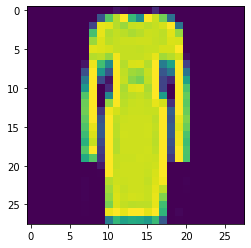

3


In [4]:
n = 2500
plt.imshow(train_imagesi[n,:,:])
plt.show()
print(train_labels[n])

In [5]:
#числа нейронов в слое(для 2-хслойной сети)
num_neuro_list = []
result = []

for num_neurons in tqdm(np.arange(0, 202, 2)):
    model = Sequential([
        Dense(num_neurons, activation='tanh', input_shape=(784,)),
        Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],)
    
    model.fit( 
        train_images,
        to_categorical(train_labels),
        epochs=15,
        batch_size=128, validation_split=0.3, verbose=0)

    model.evaluate(
        test_images,
        to_categorical(testn_labels), verbose=0,)
    
    #predict on test
    predictions = model.predict(test_images)
    result.append(100 - (len(np.where(testn_labels != np.argmax(predictions,axis=1))[0]) / len(predictions) * 100))
    
    num_neuro_list.append(num_neurons)

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [17:51<00:00, 10.60s/it]


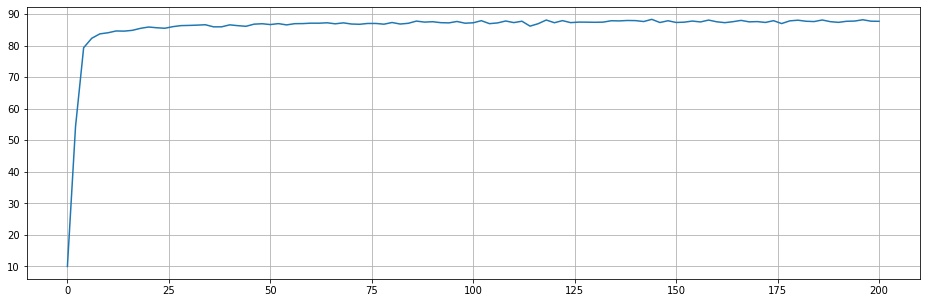

In [8]:
plt.figure(figsize = (16,5))
plt.plot(num_neuro_list, result)
plt.grid()

После определенного количества нейронов прирост всё более незначительный.

In [21]:
#числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров)
# параметры такие же, как и в предыдущем примере (только меняется кол-во слоев).
num_neuro_list2 = []
result2 = []

for num_layers in tqdm(np.arange(0, 11, 1)):
    model2 = Sequential()
    model2.add(Dense(25, activation='tanh', input_shape=(784,)))  

    for ii in range(1, num_layers+1):
        model2.add(Dense(25, activation='tanh'))

    model2.add(Dense(10, activation='softmax')) 

    model2.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],)
    
    model2.fit( 
        train_images,
        to_categorical(train_labels),
        epochs=15,
        batch_size=128, validation_split=0.3, verbose=0)

    model2.evaluate(
        test_images,
        to_categorical(testn_labels), verbose=0,)
    
    #predict on test
    predictions2 = model2.predict(test_images)
    result2.append(100 - (len(np.where(testn_labels != np.argmax(predictions2,axis=1))[0]) / len(predictions2) * 100))
    
    num_neuro_list2.append(num_layers + 2)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:53<00:00, 10.29s/it]


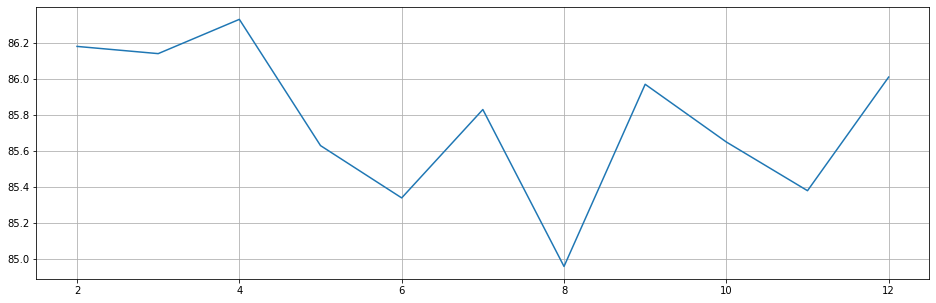

In [22]:
plt.figure(figsize = (16,5))
plt.plot(num_neuro_list2, result2)
plt.grid()

Количество слоев изменяет качество, однако после некоторого количества(в данном случае 4) слоев при одних и тех же параметрах сети качество не приростает.

#### 2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:46<00:00, 11.53s/it]


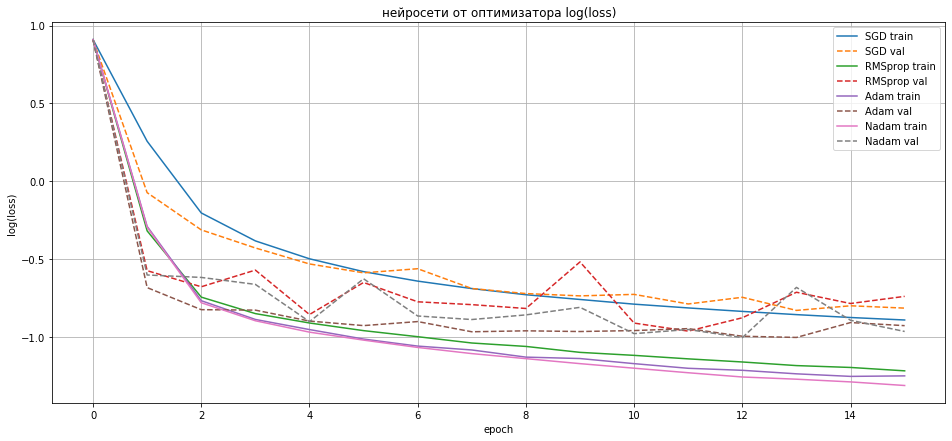

In [23]:
# Кол-во сеток: 4
# Кол-во нейрово в сетке: 25
# Функция активации: tanh
# Кол-во эпох: 15
# Размер батча(выборки): 128
# Размер проверочной выборки(eval_set): 30%

model3 = Sequential([
                      Dense( 25, activation='tanh', input_shape=(784,)),
                      Dense(25, activation='tanh'),
                      Dense(25, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model3.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
for i_optim in tqdm(['SGD','RMSProp','adam','NAdam']):
    # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = Sequential([
                      Dense(25, activation='tanh', input_shape=(784,)),
                      Dense(25, activation='tanh'),
                      Dense(25, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
          optimizer=i_optim,
          loss='categorical_crossentropy',
          metrics=['accuracy'],
          )
    # вычисляем ошибку для modeli без обучения
    hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
      # проводим обучение модели 
    hh = modeli.fit(
                      train_images,
                      to_categorical(train_labels),
                      epochs=epochs,
                      batch_size=128, validation_split=0.3, verbose = 0
                      )
    # картинки
    plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


#### 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

Оптимизатор в значительной степени улучшает качество сети, если он подобран верно, помимо этого также значительно влияет количество эпох обучения. 

#### 4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [62]:
y_test = to_categorical(testn_labels)

In [63]:
y_test_labels = np.argmax(y_test, axis=1)

In [66]:
y_pred = model2.predict(test_images)
y_class = np.argmax(y_pred, axis=1)

In [67]:
test_confusion_matrix = confusion_matrix(y_test_labels, y_class)
print(test_confusion_matrix)

[[796   0   8  39   1   1 146   0   9   0]
 [  1 951   4  36   2   0   4   0   2   0]
 [ 13   0 745  15 100   0 120   0   7   0]
 [ 22   2   8 886  37   0  41   0   4   0]
 [  0   1 101  36 792   0  64   0   5   1]
 [  0   0   0   2   0 911   0  55   4  28]
 [119   0  74  30  84   0 676   0  17   0]
 [  0   0   0   0   0  18   0 921   0  61]
 [  2   0   6   6   4   3  16   3 958   2]
 [  0   0   0   0   0   9   0  25   1 965]]


In [86]:
# !pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix as pcm

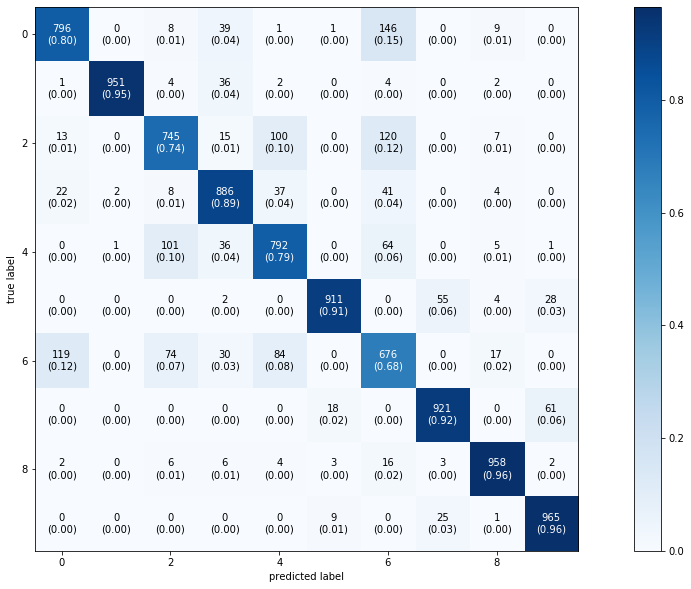

<Figure size 1152x504 with 0 Axes>

In [87]:
multiclass = test_confusion_matrix.copy()

fig, ax = pcm(conf_mat=multiclass,
                                colorbar=True,
#                                 show_absolute=False,
                                show_normed=True,
                               figsize=(20, 10))
plt.figure(figsize=(16,7))
plt.show()

In [68]:
print(classification_report(y_test_labels, y_class))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1000
           1       1.00      0.95      0.97      1000
           2       0.79      0.74      0.77      1000
           3       0.84      0.89      0.86      1000
           4       0.78      0.79      0.78      1000
           5       0.97      0.91      0.94      1000
           6       0.63      0.68      0.65      1000
           7       0.92      0.92      0.92      1000
           8       0.95      0.96      0.95      1000
           9       0.91      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [89]:
ind=np.where(train_labels==6)[0]
ind

array([   18,    32,    33, ..., 59973, 59987, 59988], dtype=int64)

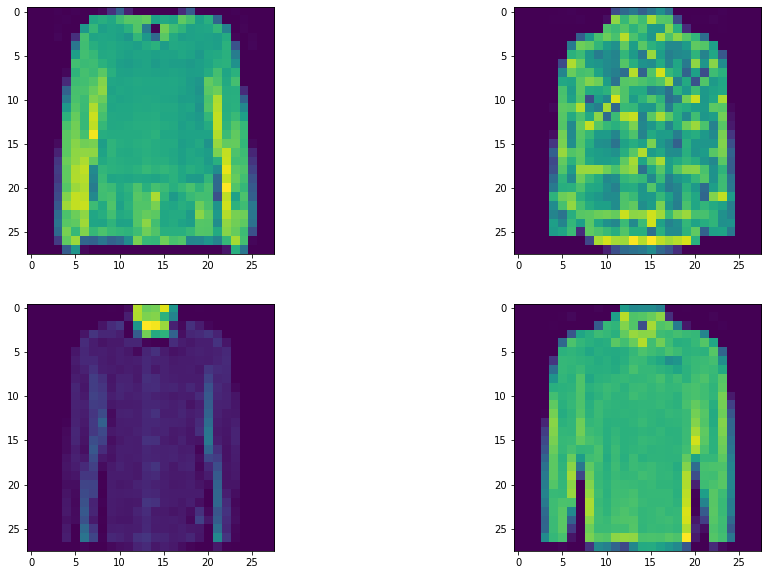

In [98]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.imshow(train_imagesi[18,:,:])

plt.subplot(222)
plt.imshow(train_imagesi[32,:,:])

plt.subplot(223)
plt.imshow(train_imagesi[33,:,:])

plt.subplot(224)
plt.imshow(train_imagesi[59973,:,:])


Достаточно высокая по сравнению с другими классами ошибка на классе №6, модель ошибается на свитрах(или это кофты/тостовки). Возможно стоило бы использовать дополнительные картинки(слои картинок) для более точной идентификации предметов.